In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import fsolve

## Forward Euler solver

In [2]:
def SIR(S0,I0,R0, beta, gamma, t_max, stepsize):
    T = np.arange(0,t_max+stepsize,stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N = S0+I0+R0
    
    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
        else:
            dS_dt = -beta * S[idx-1] * I[idx-1] / N
            dI_dt = beta * S[idx-1] * I[idx-1] / N - gamma * I[idx-1]
            dR_dt = gamma * I[idx-1]
            
            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize
    
    return S, I, R, T

In [3]:
def SIR_birthdeath(S0,I0,R0, beta, gamma, mu_b, mu_d, t_max, stepsize):
    T = np.arange(0,t_max+stepsize,stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    
    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
        else:
            N = S[idx-1]+I[idx-1]+R[idx-1] # N needs to be recalculated per timestep
            dS_dt = -beta * S[idx-1] * I[idx-1] / N - mu_d*S[idx-1] + mu_b*N
            dI_dt = beta * S[idx-1] * I[idx-1] / N - gamma * I[idx-1] - mu_d*I[idx-1]
            dR_dt = gamma * I[idx-1] - mu_d*R[idx-1]
            
            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize
    
    return S, I, R, T

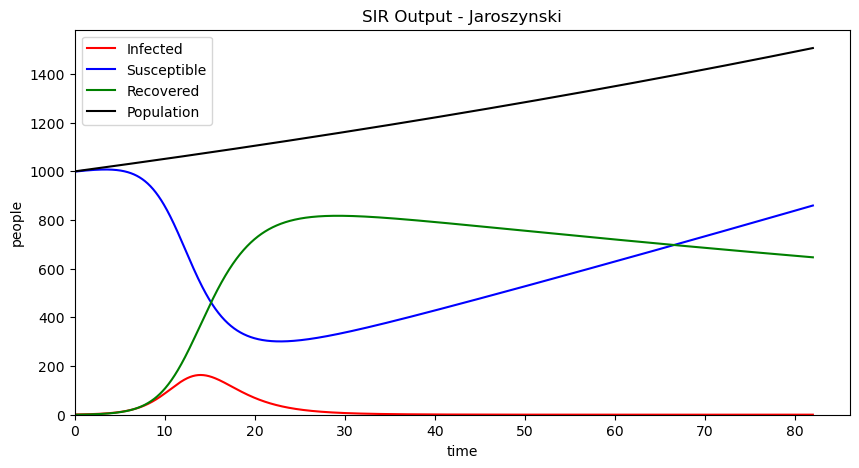

In [4]:
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
axs = [axs]
beta = 1
gamma = 0.5
mu_b = 0.01
mu_d = mu_b/2
max_t = 82
# 1000*(1+.01-0.005)^t = 1500
# t=ceil(log(1.5)/log(1.005))=82

ax = axs[0]
S,I,R,T = SIR_birthdeath(999,1,0,
             beta,gamma,mu_b,mu_d,max_t,0.05)
# ax.plot(T,S, color='b', label='Susceptibles')
ax.plot(T,I, color='r', label='Infected')
ax.plot(T,S, color='b', label='Susceptible')
ax.plot(T,R, color='g', label='Recovered')
ax.plot(T,S+I+R, color='black', label='Population')
# ax.plot(T,R, color='k', label='Recovereds')
# R0 = beta/(gamma+mu_d)
# Seq = 1/R0 * 1000
# ax.plot([0,max_t],[Seq,Seq],'b--')

for ax in axs:
    ax.set_xlabel('time')
    ax.set_ylabel('people')
    ax.set_ylim(bottom=0)
    ax.set_xlim(left=0)

plt.legend()
plt.title("SIR Output - Jaroszynski")
plt.savefig('out.nosync/q1.svg')

# 3b

/var/folders/_f/c1w13qh94r19g3yl_csjbhsr0000gn/T/ipykernel_6209/3872615864.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  g = lambda R0, x: 1-math.exp(-R0*x)


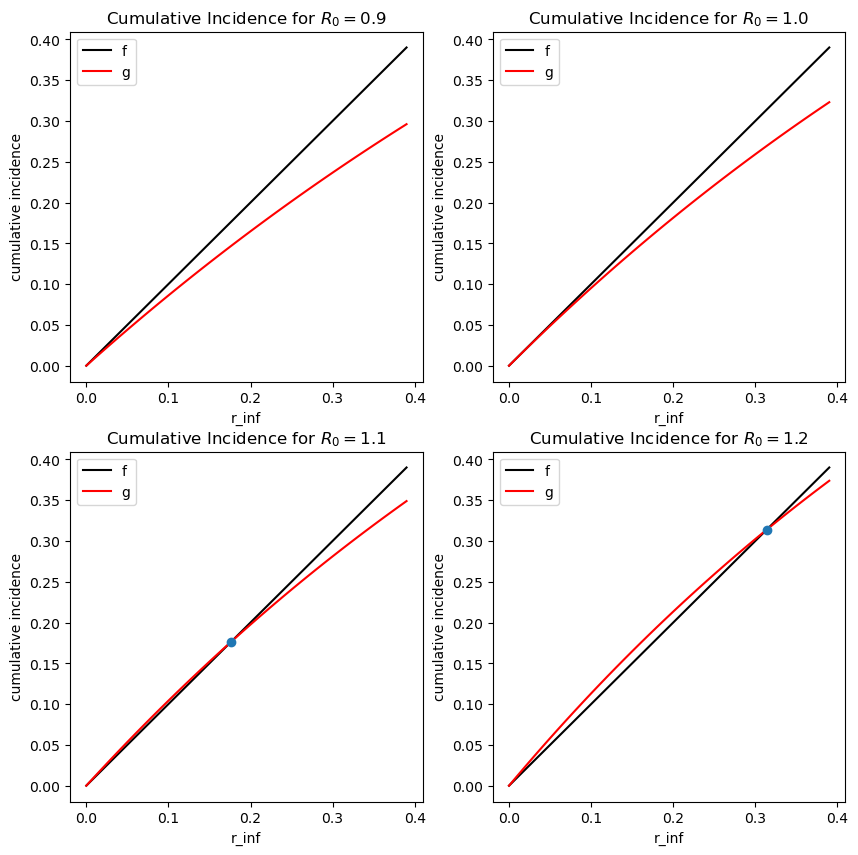

In [5]:
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

r_inf_max = 0.4
r_inf_step = 0.01
r_inf = np.arange(0,r_inf_max,r_inf_step)
R0s = [0.9, 1.0, 1.1, 1.2]

f = lambda x: x
g = lambda R0, x: 1-math.exp(-R0*x)


for R0, ax in zip(R0s, axs.flatten()):
    F = r_inf
    G = np.array([g(R0, x) for x in r_inf])
    isect = fsolve(lambda x: g(R0, x)-f(x), 1)[0]
    if isect > 0.00001:
        ax.scatter([isect], [isect], zorder=99)
    ax.plot(r_inf, F, color="black", label='f')
    ax.plot(r_inf, G, color="r", label='g')
    ax.legend()
    ax.set_title(f"Cumulative Incidence for $R_0={R0}$")
    ax.set_xlabel('r_inf')
    ax.set_ylabel('cumulative incidence')

plt.savefig('out.nosync/q3b.svg')

# 3d

R0 = 2.0, total_epidemic_size = np.float64(796.81213002002)


/var/folders/_f/c1w13qh94r19g3yl_csjbhsr0000gn/T/ipykernel_6209/3872615864.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  g = lambda R0, x: 1-math.exp(-R0*x)


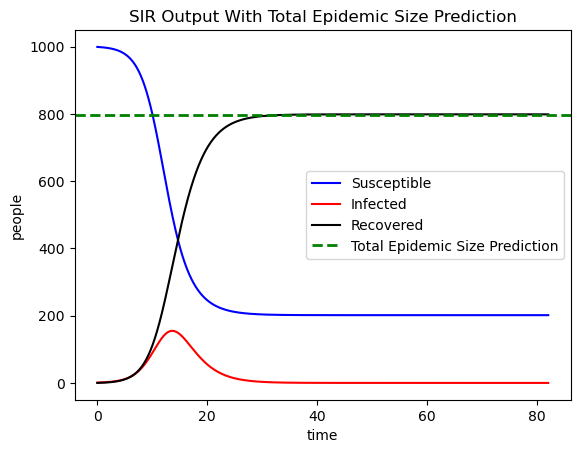

In [6]:
beta = 1
gamma = 0.5
R0 = beta/gamma
N = 1000
total_epidemic_size = N * fsolve(lambda x: g(R0, x)-f(x), 1)[0]
print(f"{R0 = }, {total_epidemic_size = }")
S,I,R,T = SIR(N-1,1,0, beta,gamma,max_t,0.05)
plt.plot(T,S, color='b', label='Susceptible')
plt.plot(T,I, color='r', label='Infected')
plt.plot(T,R, color='k', label='Recovered')
plt.axhline(y=total_epidemic_size, color='g', linestyle='--', linewidth=2, label='Total Epidemic Size Prediction')
plt.legend()
plt.xlabel('time')
plt.ylabel('people')
plt.title("SIR Output With Total Epidemic Size Prediction")
plt.savefig('out.nosync/q3d.svg')

# 4

R0 = 2.0
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


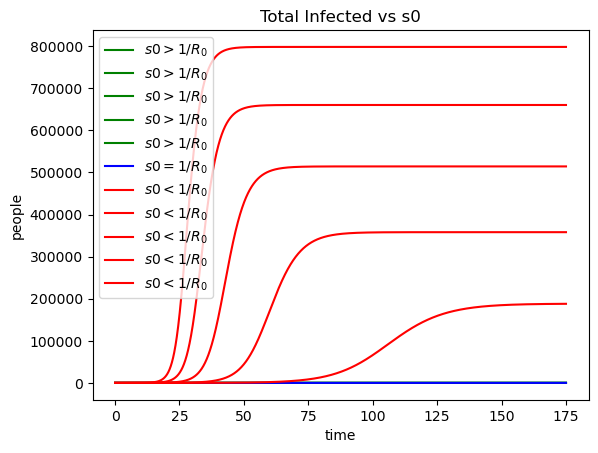

In [7]:
beta = 1
gamma = 0.5
R0 = beta/gamma
R0_inv = 1/R0
print(f"{R0 = }")
s0s = np.arange(0, 1.1, 0.1)
print(s0s)
N = 10**6
max_t = 175

for s0 in s0s:
    S0 = (N-1)*s0
    R0 = (N-1)*(1-s0)
    S,I,R,T = SIR(S0,1,R0, beta,gamma,max_t,0.05)
    label = ""
    if s0 == R0_inv:
        color = "b"
        label = "$s0 = 1/R_0$"
    elif s0 < R0_inv:
        color = "g"
        label = "$s0 > 1/R_0$"
    else:
        color = "r"
        label = "$s0 < 1/R_0$"
    plt.plot(T, R-R0, color=color, label=label)
plt.legend()
plt.xlabel('time')
plt.ylabel('people')
plt.title("Total Infected vs s0")
plt.savefig('out.nosync/q4.svg')

# 4 v2

R0 = 2.0


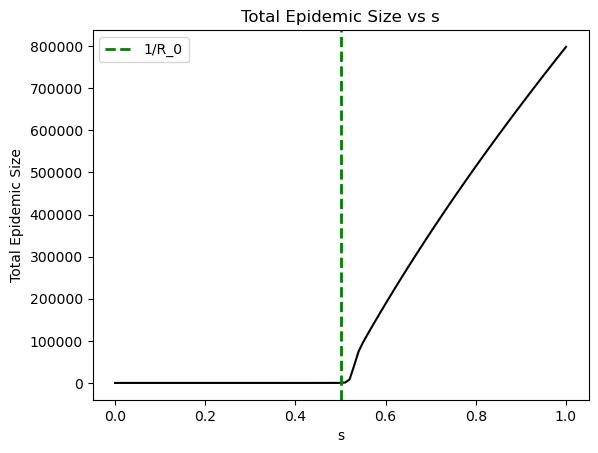

In [28]:
beta = 1
gamma = 0.5
R0 = beta/gamma
R0_inv = 1/R0
print(f"{R0 = }")
step = 0.01
s0s = np.arange(0, 1+step, step)
N = 10**6
max_t = 300

total_epidemic_size = []

for s0 in s0s:
    S0 = (N-1)*s0
    R0 = (N-1)*(1-s0)
    S,I,R,T = SIR(S0,1,R0, beta,gamma,max_t,0.05)
    total_epidemic_size.append((R-R0)[-1])

# total_epidemic_size = [math.log(v) for v in total_epidemic_size]

plt.plot(s0s, total_epidemic_size, color="k")
plt.axvline(x=R0_inv, color='g', linestyle='--', linewidth=2, label='1/R_0')
plt.legend()
plt.xlabel('s')
plt.ylabel('Total Epidemic Size')
plt.title("Total Epidemic Size vs s")
plt.savefig('out.nosync/q4.svg', bbox_inches='tight')